## Homework 3

## <em>Intro to Data Analysis, Dimensionality Reduction, and Clustering</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [1]:
from client.api.notebook import Notebook
ok = Notebook('hw3_188.ok')
_ = ok.auth(inline = True)

Assignment: Homework 3
OK, version v1.12.5

Successfully logged in as chancetran@berkeley.edu


### Imports

In [2]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Fitting Gaussian Contours to a 2D Data

Gaussian distribution function plays a central role in statistics and is the most ubiquitous distribution in physics. It often provides a good approximation to the true probability density function (pdf) even in cases where its application is not strictly correct. <br><br>
In this problem, suppose that you have measured 1000 pairs of values $(x_1, y_1), ... , (x_{1000}, y_{1000})$ of two variables $x, y$. You saved these measurements to a .dat file ("Problem1_data.dat"). Plot their 1-dimensional pdf's and determine how well Gaussian pdf can approximate them. Compute the mean, variance, median, mode, 68% and 95% confidence intervals, and correlation coefficient.

<span style="color:blue"><i> 1. Plot 1-dimensional pdf for $x$. </i></span> <br>

In [3]:
# Load a given 2D data
data = np.loadtxt("Problem1_data.dat")
x = data[:,0]
y = data[:,1]

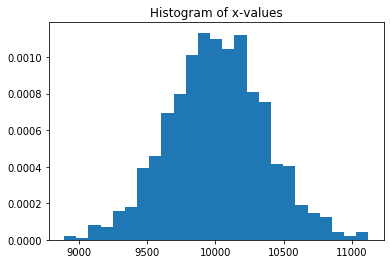

In [4]:
#Constant
n = 25

# Plot a normalized histogram (Hint - https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)
# Try to have 25 elements per each bin
plt.title("Histogram of x-values")
xHist = plt.hist(x, bins = n, density = True)

<span style="color:blue"> <i> 2. Calculate mean, variance, and median of $x$. First, do it "by hand" without using any in-built functions. Then, check your answers using in-built functions from numpy. </i></span>

In [5]:
# Calculating "by hand"
mean_x = sum(x) / len(x)
variance_x = sum((x - mean_x) ** 2) / (len(x) - 1)        #Using sample variance.
median_x = (np.sort(x)[(len(x) // 2) - 1] + np.sort(x)[len(x) // 2]) / 2

print("For x, mean = ", mean_x, ", variance = ", variance_x, ", and median = ", median_x)

# Using in-built functions from numpy
mean_x = np.mean(x)
variance_x = np.var(x, ddof = 1)
median_x = np.median(x)

print("For x, mean = ", mean_x, ", variance = ", variance_x, ", and median = ", median_x)

For x, mean =  10011.593923673052 , variance =  125571.25247296163 , and median =  10011.816732099978
For x, mean =  10011.59392367306 , variance =  125571.25247296163 , and median =  10011.816732099978


<span style="color:blue"> <i> 3. Smoothly interpolate the discrete probability density from Part 1. Then, find the mode and symmetric 68%, 95% confidence intervals. (Suggestion - Read https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html and https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html)</i></span><br><br>
(Hint - For 68% confidence interval, find the range where 68% of the given sample occurs. We assume that such interval is symmetrically placed around the mean. <br>
In other words, find $a$ such that
$$ 0.68 = \int_{\mu-a}^{\mu+a} P(x) $$
where $P(x)$ is $x$'s pdf, and $\mu$ is the mean.<br>
One way to find $a$ is to define a cumulative distribution function (cdf) $G(x)$ and find $a$ such that $G(\mu+a)-G(\mu-a) = .68$.)

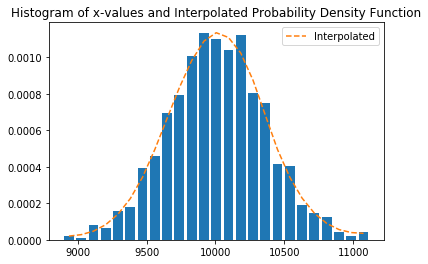

In [6]:
# NOTE: The following skeleton code is only a suggestion.
from scipy.interpolate import UnivariateSpline

p, xvar = np.histogram(x, bins = n, density = True)
# Find x values at the center of each bin (call it xvar)
xvar = xvar[:-1] + (xvar[1] - xvar[0])/2

# Find the interpolated function f
f = UnivariateSpline(xvar, p, s = n)
# Change the amount of smoothing
f.set_smoothing_factor(5.0e-8)

# Plot both histogram and interpolated function
plt.hist(x, bins = n, density = True, rwidth = 0.8)
plt.plot(xvar, f(xvar), '--', label = "Interpolated")
plt.title("Histogram of x-values and Interpolated Probability Density Function")
plt.legend()
plt.show()

In [7]:
from scipy.stats import mode

# Find the mode
mode_x = mode(x)[0][0]

print("For x, mode = ", mode_x)

# Find 68% and 95% confidence intervals
sixtyeight = quad(f, mean_x - np.sqrt(variance_x), mean_x + np.sqrt(variance_x))[0]
ninetyfive = quad(f, mean_x - 2 * np.sqrt(variance_x), mean_x + 2 * np.sqrt(variance_x))[0]

print("The integral of the PDF for x on the interval [mean - sigma, mean + sigma], is", sixtyeight)
print("The integral of the PDF for x on the interval [mean - 2*sigma, mean + 2*sigma], is", ninetyfive)

For x, mode =  8891.323497226997
The integral of the PDF for x on the interval [mean - sigma, mean + sigma], is 0.688450261383513
The integral of the PDF for x on the interval [mean - 2*sigma, mean + 2*sigma], is 0.9512681750125511


Assuming that the distribution is Gaussian, 68% and 95% confidence interval corresponds to $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$.  </i></span>

In [8]:
print("Assuming Gaussian distribution, 68% confidence interval is", mean_x, "±", np.sqrt(variance_x), 
     ", and 95% interval is", mean_x, "±", 2*np.sqrt(variance_x))

Assuming Gaussian distribution, 68% confidence interval is 10011.59392367306 ± 354.3603426922398 , and 95% interval is 10011.59392367306 ± 708.7206853844796


You should find that the Gaussian distribution is a reasonable approximation in this case.

<span style="color:blue"> <i> 4. Plot Gaussian distribution with the mean and variance from Part 1 on top of probability density histogram. Make sure to label each plot. </i></span>

In [9]:
# Define Gaussian distribution
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * (sigma **2))) / np.sqrt(2 * np.pi * (sigma ** 2))

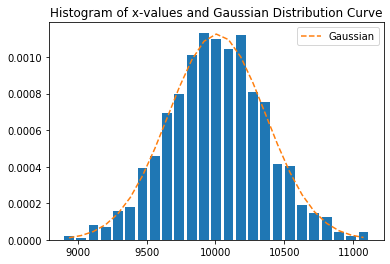

In [10]:
p, xvar = np.histogram(x, bins = n, density = True)
# Find x values at the center of each bin (call it xvar)
xvar = xvar[:-1] + (xvar[1] - xvar[0])/2

# Plot both histogram and Gaussian distribution
plt.hist(x, bins = n, density = True, rwidth = 0.8)
plt.plot(xvar, gaussian(xvar, mean_x, np.sqrt(variance_x)), '--', label = "Gaussian")
plt.title("Histogram of x-values and Gaussian Distribution Curve")
plt.legend()
plt.show()


<span style="color:blue"> <i> 5. Repeat part 1-4 for $y$.  </i></span>

For y, mean =  25.825405595652825 , variance =  339346.6518078211 , and median =  32.16872896054926


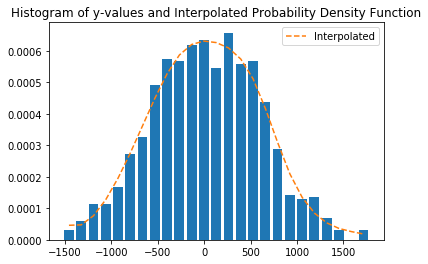

For y, mode =  -1523.0171149059126
The integral of the PDF for y on the interval [mean - sigma, mean + sigma], is 0.6686439983145046
The integral of the PDF for y on the interval [mean - 2*sigma, mean + 2*sigma], is 0.9557721865546261


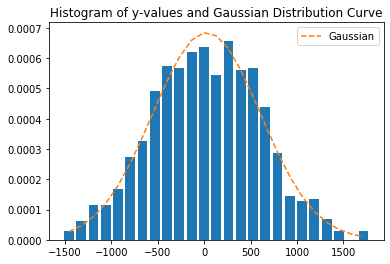

In [11]:
##### Find mean, variance and median #####
# Using in-built functions from numpy
mean_y = np.mean(y)
variance_y = np.var(y, ddof = 1)
median_y = np.median(y)

print("For y, mean = ", mean_y, ", variance = ", variance_y, ", and median = ", median_y)



##### Plot histogram (discrete pdf) and interpolate it #####
p, yvar = np.histogram(y, bins = n, density = True)
# Find y values at the center of each bin (call it yvar)
yvar = yvar[:-1] + (yvar[1] - yvar[0])/2

# Find the interpolated function f
f = UnivariateSpline(yvar, p, s = n)
# Change the amount of smoothing
f.set_smoothing_factor(3.0e-8)

# Plot both histogram and interpolated function
plt.hist(y, bins = n, density = True, rwidth = 0.8)
plt.plot(yvar, f(yvar), '--', label = "Interpolated")
plt.title("Histogram of y-values and Interpolated Probability Density Function")
plt.legend()
plt.show()



##### Find mode and 68%, 95% confidence interval #####
# Find the mode
mode_y = mode(y)[0][0]

print("For y, mode = ", mode_y)

# Find 68% and 95% confidence intervals
sixtyeight = quad(f, mean_y - np.sqrt(variance_y), mean_y + np.sqrt(variance_y))[0]
ninetyfive = quad(f, mean_y - 2 * np.sqrt(variance_y), mean_y + 2 * np.sqrt(variance_y))[0]

print("The integral of the PDF for y on the interval [mean - sigma, mean + sigma], is", sixtyeight)
print("The integral of the PDF for y on the interval [mean - 2*sigma, mean + 2*sigma], is", ninetyfive)



##### Plot Gaussian fit on top of the histogram #####
p, yvar = np.histogram(y, bins = n, density = True)
# Find x values at the center of each bin (call it xvar)
yvar = yvar[:-1] + (yvar[1] - yvar[0])/2

# Plot both histogram and Gaussian distribution
plt.hist(y, bins = n, density = True, rwidth = 0.8)
plt.plot(yvar, gaussian(yvar, mean_y, np.sqrt(variance_y)), '--', label = "Gaussian")
plt.title("Histogram of y-values and Gaussian Distribution Curve")
plt.legend()
plt.show()

<span style="color:blue"> <i> 6. Make a 2-d scatter plot with Gaussian contours (ellipses). Then, compute the covariance ($C_{xy}$) of $x$ and $y$ as well as the correlation coefficient $\rho = \frac{C_{xy}}{\sigma_{x}\sigma_{y}}$.  </i></span>

In [12]:
# Bivariate Gaussian distribution for equal shape *X*, *Y*.
# SOURCE: Byeonghee
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.0):
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

The covariance between x and y is 166620.38049981196
The correlation coefficient of x and y is 0.8071629606146948


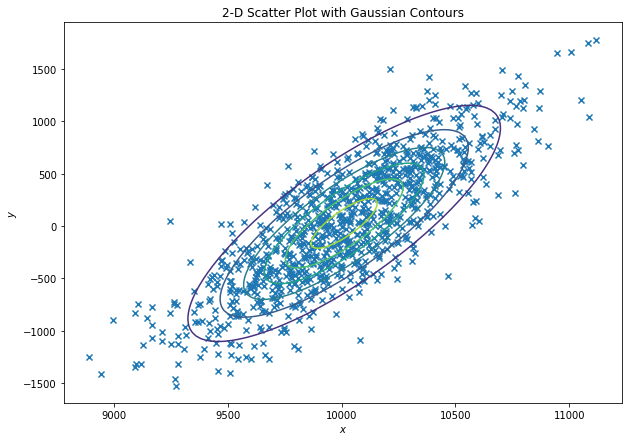

In [13]:
# Compute the covariance and correlation coefficient
cov = np.cov(x, y)[0][1]

print("The covariance between x and y is", cov)

print("The correlation coefficient of x and y is", cov / (np.sqrt(variance_x) * np.sqrt(variance_y)))

# Make a 2-d scatter plot with Gaussian contours
import scipy.stats as stats

# Create coordinate matrices from coordinate vectors.
gridx = np.linspace(9000, 11000, 100)
gridy = np.linspace(-1500, 1500, 100)
X, Y = np.meshgrid(gridx, gridy)

# Create bivariate Gaussian distribution for equal shape X, Y (https://matplotlib.org/api/mlab_api.html)
Z = bivariate_normal(X, Y, np.sqrt(variance_x), np.sqrt(variance_y), mean_x, mean_y, cov)

# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot
plt.scatter(x, y, marker = 'x')
# Gaussian contour plots
plt.contour(X, Y, Z)

plt.title("2-D Scatter Plot with Gaussian Contours")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The above contour plot is a bird eye view of the 3-d mesh plot; these are ellipses of equal probability. The coloring represents the intensity. Yellow central ellipse is the region of highest probability; the peak of 2-d Gaussian distribution is at the center of this ellipse. As we move away from the peak, the probability lowers.

***

#### Problem 2 - Central Limit Theorem

Plot the binomial distribution $P(N_A, N)$ for different values of $N$ and plot the Gaussian with mean and variance for the binomial. Similarly, plot the Poisson distribution with the mean varying from 1 to 10. See if both binomial and Poisson approach Gaussian as the mean/$N$ increases.<br><br>
(Reference - Kardar p. 41) For the binomial distribution, consider a random variable with two outcomes $A$ and $B$ of relative probabilities $p_A$ and $p_B = 1 - p_A$. The probability that in $N$ trials the event $A$ occurs exactly $N_A$ times is given by the binomial distribution:
$$ p_N(N_A) = \binom{N}{N_A} p_A^{N_A}(1-p_A)^{N-N_A}. $$
<br>
<span style="color:blue"> <i> 1. Plot the binomial distribution $P(N_A, N)$ for $N = 5, 20, 40, 100, 300$ and plot the Gaussian with mean and variance for the binomial. Let $p_A = 0.5$ and $0.1$. Make sure to label each plot.  </i></span>

In [14]:
# Import packages for the bionomial coefficient
from scipy.special import binom

# Define the probability for the binomial distribution
def pdf_binom(p_A, N, N_A):
    return binom(N, N_A) * (p_A ** N_A) * ((1 - p_A) ** (N - N_A))

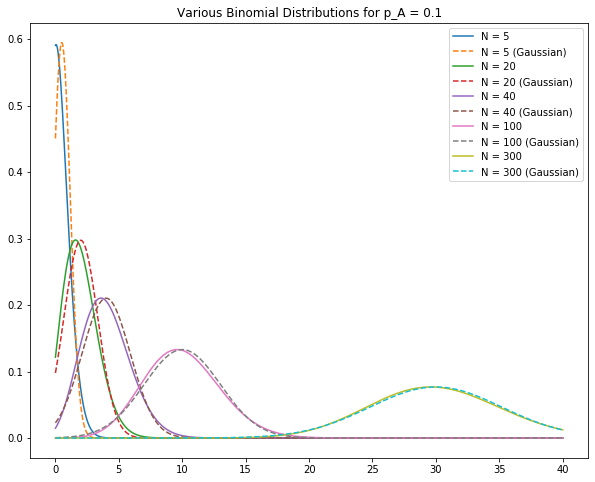

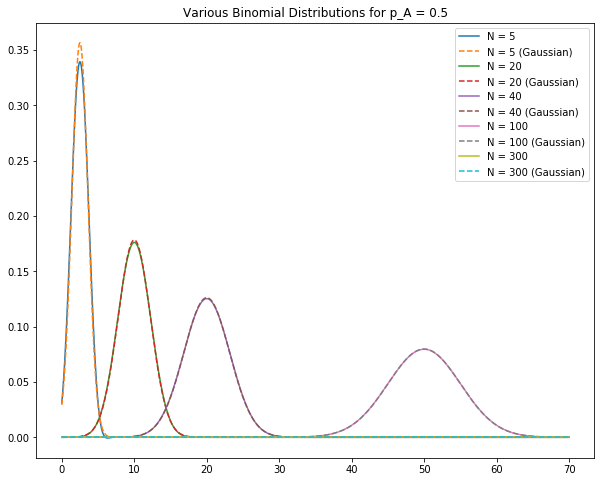

In [15]:
# Graphs binomial distributions given a p_A, N, and N_A.
def distribution(p_A, N, N_A):
    p = [np.zeros_like(N_A) for _ in N]
    for i in range(N.size):
        # Calculates the binomial and gaussian distributions for a given p_A and N.
        binom = np.vectorize(pdf_binom)(p_A, N[i], N_A)
        gauss = gaussian(N_A, N[i] * p_A, np.sqrt(N[i] * p_A * (1 - p_A)))
        
        # Plots the distributions.
        plt.plot(N_A, binom, linestyle = "solid", label = "N = " + str(N[i]))
        plt.plot(N_A, gauss, linestyle = "dashed", label = "N = " + str(N[i]) + " (Gaussian)")
    
    plt.legend()
    plt.show()

##### Make plot #####
N = np.array([5, 20, 40, 100, 300])

# For p_A = 0.1
N_A = np.linspace(0, 40, 1000)
plt.figure(figsize = (10, 8))
p_A = 0.1
plt.title("Various Binomial Distributions for p_A = 0.1")
distribution(p_A, N, N_A)

# For p_A = 0.5
N_A = np.linspace(0, 70, 1000)
plt.figure(figsize = (10, 8))
p_A = 0.5
plt.title("Various Binomial Distributions for p_A = 0.5")
distribution(p_A, N, N_A)

In class, we find that the binomial distribution is approximately normal (with mean $Np_A$ and variance $Np_A(1-p_A)$) as $N \rightarrow \infty$, by the central limit theorem. The proof of this theorem can be carried out using Stirling's approximation:
$$ N! \approx N^N e^{-N}\sqrt{2\pi N} $$
<br>
<span style="color:blue"><i> 2. Plot the above Stirling's formula approximation (i.e. Compare $N!$ with Stirling's approximation. Compute the residual: (actual-estimate)/actual.) </i></span><br>
(Hint: $\Gamma(n+1) = n!$)


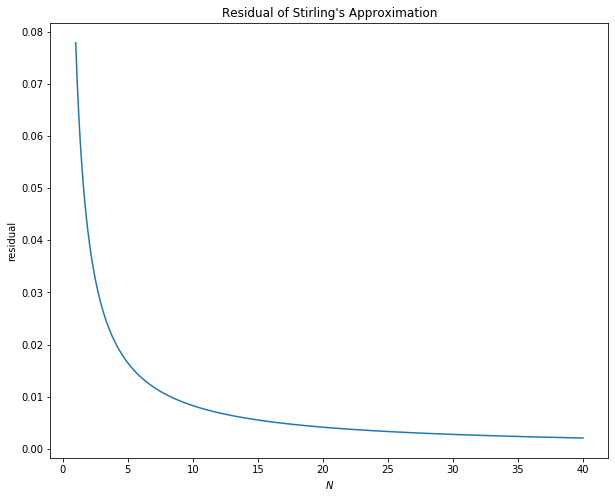

In [16]:
from scipy.special import gamma

Nvals = np.linspace(1, 40, 1000)

actual = np.vectorize(lambda n: gamma(n + 1))(Nvals)
estimate = np.vectorize(lambda n: (n ** n) * np.exp(-n) * np.sqrt(2 * np.pi * n))(Nvals)

plt.figure(figsize = (10, 8))
plt.plot(Nvals, (actual-estimate)/actual)
plt.title("Residual of Stirling's Approximation")
plt.xlabel('$N$')
plt.ylabel('residual')
plt.show()

You should find that residual $\rightarrow 0$ as $N \rightarrow \infty$.

Next, consider the Poisson distribution (Kardar p. 42):
$$ P(\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$
where $k$ is the number of occurrences. Its mean and variance are $\lambda$.<br><br>
<span style="color:blue"> <i> 3. Plot $P(\lambda)$ as a function of $k$ for $\lambda = 1, 3, 5, 10, 20$ and plot the Gaussian with mean and variance for the Poisson. Make sure to label. </i></span><br>

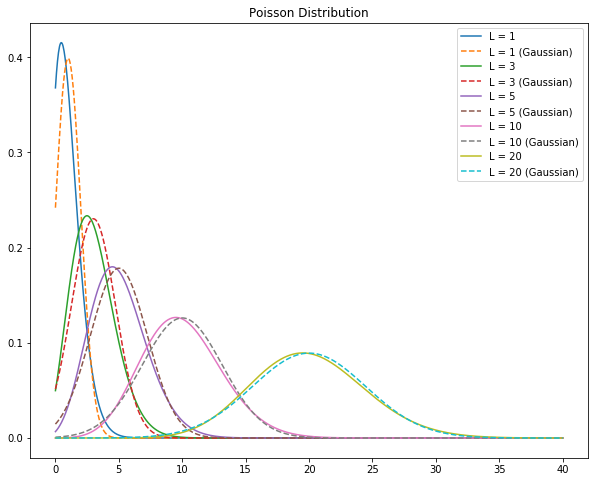

In [17]:
# Define the Poisson distribution
def poisson(L, k):
    return ((L ** k) * np.exp(-L)) / gamma(k + 1)

##### Make plot #####
L = np.array([1, 3, 5, 10, 20])

k = np.linspace(0, 40, 1000)

plt.figure(figsize = (10, 8))
for i in range(L.size):
    poiss = np.vectorize(poisson)(L[i], k)
    gauss = gaussian(k, L[i], np.sqrt(L[i]))
    plt.plot(k, poiss, linestyle = "solid", label = "L = " + str(L[i]))
    plt.plot(k, gauss, linestyle = "dashed", label = "L = " + str(L[i]) + " (Gaussian)")
plt.title("Poisson Distribution")
plt.legend()
plt.show()

<span style="color:blue"> <i> 4. What happens as the $\textrm{mean} / \textrm{N}$ increases? </i></span><br>

<span style="color:blue"><i> Answer: As $\textrm{mean} / \textrm{N}$ increases, the Poisson distribution resembles a Gaussian distribution. </i></span><br>

***

#### Problem 3 - Fitting Data to a Straight Line (Linear Regression)

(Reference - NR 15.2) We fit a set of 50 data points $(x_i, y_i)$ to a straight-line model $y(x) = a + bx$. The uncertainty $\sigma_i$ associated with each measurement $y_i$ is known, and we assume that the $x_i$'s are known exactly. To measure how well the model agrees with the data, we use the chi-square merti function: <br>
$$ \chi^2(a,b) = \sum_{i=0}^{N-1} \big( \frac{y_i-a-bx_i}{\sigma_i} \big)^2. $$
<br>
Make a scatter plot of data (including uncertainties) and find the best-fit line. Compute the errors on the two parameters $a$ and $b$ and plot lines where the two are changed by $\pm 1\sigma$.

<br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>

In [18]:
# Load a given 2D data
data = np.loadtxt("Problem3_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

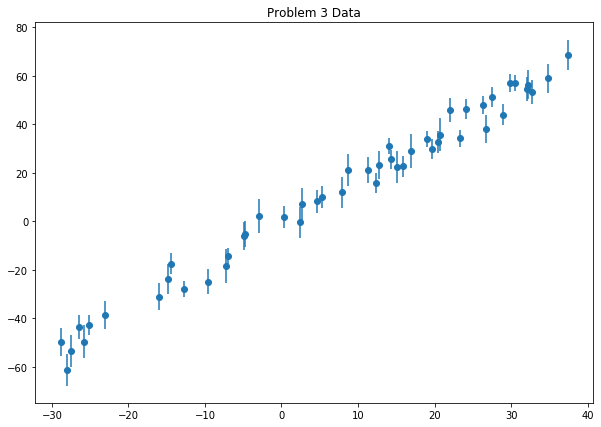

In [19]:
# Make plot
plt.figure(figsize = (10, 7))

# Scatter plot
plt.errorbar(x, y, yerr = sig_y, linestyle = 'None', marker = 'o')
plt.title("Problem 3 Data")
plt.show()

(NR p. 781) We should minimize the above chi-square function to determine $a$ and $b$. At its minimum, derivatives of $\chi^2$ with respect to $a, b$ vanish:
$$ \frac{\partial{\chi^2}}{\partial{a}} = -2 \sum \frac{y_i - a - bx_i}{\sigma_i^2} = 0 \ \ \ \ \ \ \ \ \ \ \ \ (1) $$
$$ \frac{\partial{\chi^2}}{\partial{b}} = -2 \sum \frac{x_i(y_i - a - bx_i)}{\sigma_i^2} = 0   \ \ \ \ \ \ \ \ \ (2) $$
<br>
These conditions can be rewritten in a convenient form if we define the following sums:
$$ S = \sum \frac{1}{\sigma_i^2},\ S_x = \sum \frac{x_i}{\sigma_i^2},\ S_y = \sum \frac{y_i}
{\sigma_i^2} $$
$$ S_{xx} = \sum \frac{x_i^2}{\sigma_i^2},\ S_{xy} = \sum \frac{x_iy_i}{\sigma_i^2} $$
<br> With these, we can rewrite (1), (2) as:
$$ a*S + b*S_x = S_y $$
$$ a*S_x + b*S_{xx} = S_{xy} $$
<br> The solution to these is calculated as:
$$ \Delta = SS_{xx} - (S_x)^2 $$ <br>
$$ a = \frac{S_{xx}S_y - S_xS_{xy}}{\Delta} $$
$$ b = \frac{SS_{xy} - S_xS_y}{\Delta} $$
<br><span style="color:blue"><i> 2. Find parameters $a, b$ which minimize the chi-square function and plot the best-fit line on top of the data. </i></span><br>

In [20]:
S = np.sum(1 / (sig_y ** 2))
Sx = np.sum(x / (sig_y ** 2))
Sy = np.sum(y / (sig_y ** 2))
Sxx = np.sum((x ** 2) / (sig_y ** 2))
Sxy = np.sum((x * y) / (sig_y ** 2))
Delta = S * Sxx - (Sx ** 2)

In [21]:
a = ((Sxx * Sy) - (Sx * Sxy)) / Delta
b = ((S * Sxy) - (Sx * Sy)) / Delta

# Calculates the linear regression for a given a and b.
def linearFit(a, b, x):
    return a + b * x

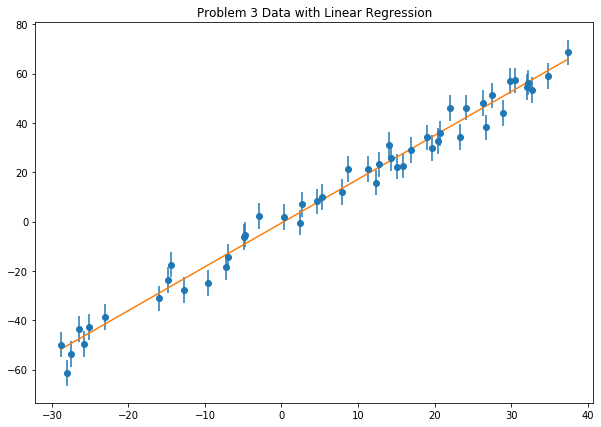

In [22]:
##### Make plot #####
xFit = np.linspace(x.min(), x.max(), 100)
yFit = linearFit(a, b, xFit)

plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = np.mean(sig_y), linestyle = 'None', marker = 'o')
plt.plot(xFit, yFit)
plt.title("Problem 3 Data with Linear Regression")
plt.show()

Now, we must estimate the probable uncertainties in the estimates of $a$ and $b$, since obviously the measurement errors in the data must introduce some uncertainty in the determination of those parameters. If the data are independent, then each contributes its own bit of uncertainty to the parameters. Consideration of propagation of errors show that the variance $\sigma_f^2$ in the value of any function will be 
$$ \sigma_f^2 = \sum \sigma_i^2 (\frac{\partial f}{\partial y_i})^2 $$
<br> For the straight line, the derivatives of $a$ and $b$ with respect to $y_i$ can be directly evaluated from teh solution:
$$ \frac{\partial a}{\partial y_i} = \frac{S_{xx}-S_x x_i}{\sigma_i^2 \Delta} $$
$$ \frac{\partial b}{\partial y_i} = \frac{S x_i-S_x}{\sigma_i^2 \Delta} $$
<br> Summing over the points, we get
$$ \sigma_a^2 = S_{xx}/\Delta $$
$$ \sigma_b^2 = S/\Delta $$

<span style="color:blue"> <i> 3. Compute the errors ($\sigma_a, \sigma_b$) on the two parameters $a, b$ and plot lines where the two are changed by $\pm 1\sigma$.</i></span><br>
(Hint - Try to plot the 1$\sigma$ confidece band as in http://astropython.blogspot.com/2011/12/. You can use plt.fill_between to shade the region between plots.)

In [23]:
# Calculate sigma_a, sigma_b
sigma_a = np.sqrt(Sxx / Delta)
sigma_b = np.sqrt(S / Delta)

print('We estimate that a =', a ,"±", sigma_a, "and b =", b, "±", sigma_b)

We estimate that a = -0.5952309466393884 ± 0.7528657804413228 and b = 1.7746965875529703 ± 0.036240121236055294


In [24]:
""" Calculates the confidence band of the linear regression model at the desired confidence
level, using analytical methods. The 2sigma confidence interval is 95% sure to contain 
the best-fit regression line. This is not the same as saying it will contain 95% of 
the data points.

Source: https://gist.github.com/rsnemmen/f2c03beb391db809c90f """
def confband(xd,yd,a,b,conf=0.95,x=None):
    alpha=1.-conf    # significance
    n=xd.size    # data sample size

    if x==None: x=np.linspace(xd.min(),xd.max(),100)

    # Predicted values (best-fit model)
    y=a+b*x

    # Auxiliary definitions
    sd=scatterfit(xd,yd,a,b)    # Scatter of data about the model
    sxd=np.sum((xd-xd.mean())**2)
    sx=(x-xd.mean())**2	# array

    # Quantile of Student's t distribution for p=1-alpha/2
    q=stats.t.ppf(1.-alpha/2.,n-2)

    # Confidence band
    dy=q*sd*np.sqrt( 1./n + sx/sxd )
    ucb=y+dy    # Upper confidence band
    lcb=y-dy    # Lower confidence band

    return lcb,ucb,x

""" Compute the mean deviation of the data about the linear model given if A,B  
(y=ax+b) provided as arguments. Otherwise, compute the mean deviation about   
the best-fit line. 

Source: https://gist.github.com/rsnemmen/0eb32832c657c19e4d39 """  
def scatterfit(x,y,a=None,b=None):  
    if a==None:   
        # Performs linear regression  
        a, b, r, p, err = stats.linregress(x,y)  

    # Std. deviation of an individual measurement (Bevington, eq. 6.15)  
    N=np.size(x)  
    sd=1./(N-2.)* np.sum((y-a*x-b)**2); sd=np.sqrt(sd) 
    
    return sd

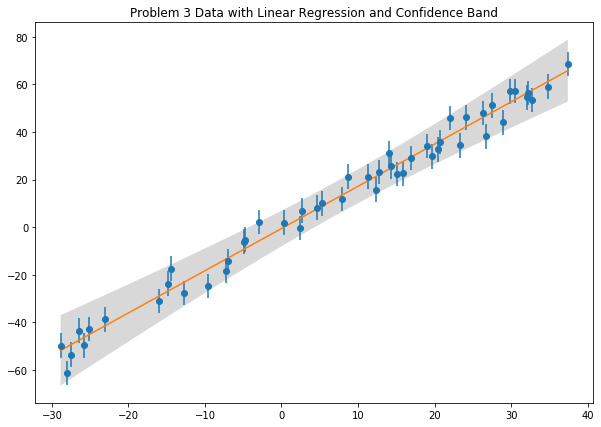

In [25]:
##### Make plot #####
# Determines the lower-bound and upper-bound of the confidence band.
lcb, ucb, xcb = confband(x, y, a, b, conf = 0.68)

plt.figure(figsize = (10, 7))
plt.fill_between(xcb, lcb, ucb, alpha = 0.3, facecolor = 'grey')
plt.errorbar(x, y, yerr = np.mean(sig_y), linestyle = 'None', marker = 'o')
plt.plot(xFit, yFit)
plt.title("Problem 3 Data with Linear Regression and Confidence Band")
plt.show()

***

#### Problem 4 - UMAP + clustering

Yann LeCun and collaborators collected and processed  70,000  handwritten digits to produce what became known as the most widely used database in ML, called MNIST. Each handwritten digit comes in a square image, divided into a  28×28  pixel grid. Every pixel can take on  256  nuances of the gray color, interpolating between white and black, and hence each the data point assumes any value in the set  {0,1,…,255}. There are  10  categories in the problem, corresponding to the ten digits.

Ever since, the MNIST problem has become an important standard for benchmarking the performance of more sophisticated Machine Learning models. Often times, there are contests for finding a new constellation of hyperparameters and/or model architecture which results in a better accuracy for correctly classifying the digits.

In [26]:
import zipfile

zip = zipfile.ZipFile('x_MNIST.dat.zip')
zip.extractall()
zip = zipfile.ZipFile('y_MNIST.dat.zip')
zip.extractall()

# Load MNIST data
# IMPORTANT!! 20% of the data already selected! 
# e.g. print the length of Y vector, and it will say 14,000 (20% of the whole MNIST data)
X = np.loadtxt('x_MNIST.dat')
Y = np.loadtxt('y_MNIST.dat')

"$X$" contains information about the given MNIST digits. We have a 28x28 pixel grid, so each image is a vector of length 784; we have 70,000 images (digits), so $X$ is a 70,000x784 matrix. "$Y$" is a label (0-9; the category to which each image belongs) vector of length 70,000.

<span style="color:blue"> <i> 1. Do the following:

(1) Randomly shuffle data (i.e. randomize the order)

  (Note: The label $Y_1$ corresponds to a vector $X_{1j}$, and even after shuffling, $Y_1$ should still correspond to $X_{1j}$.)
  
  
(2) Select only 20% of the data. (due to memory issues; if your code keeps crashing, you can go down to 10%.)


(3) Split data into training and test samples using train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Set train_size = 0.8. (80% of $X$ is our training samples.) Print the dimension of training and test samples. </i></span> <br>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state, shuffle

# shuffle data
X, Y = shuffle(X, Y)

# pick training and test data sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

print(np.shape(X_train), np.shape(Y_train))
print(np.shape(X_test), np.shape(Y_test))

(11200, 784) (11200,)
(2800, 784) (2800,)


<span style="color:blue"> <i> 2. Choose any five images and show what they look like. Also, print the corresponding label to each image. </i></span> <br>

Hint: each image is a vector of length 784. So reshape it into a 28x28 matrix.

&nbsp; **X_0 = X_train[0]** <br>
&nbsp; **X_0 = X_0.reshape((28, 28))**
  
Then, make a plot using imshow

&nbsp; **plt.imshow(X_0, cmap=plt.cm.gray)**

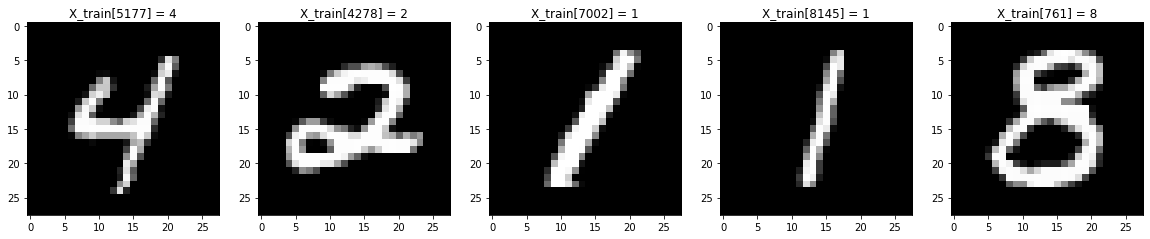

In [28]:
# Constant.
n = 5

fig, axs = plt.subplots(1, 5, figsize=(20, 10))
# Generates five random images and their corresponding labels.
for i in range(n):
    index = np.random.randint(0, Y_train.size - 1)
    
    axs[i].set_title("X_train[" + str(index) + "] = " + str(int(Y_train[index])))
    axs[i].imshow(X_train[index].reshape((28, 28)), cmap=plt.cm.gray)

The following exercises are taken from the tutorial here: https://umap-learn.readthedocs.io/en/latest/index.html. Please go through them if you want to learn more about the umap package.

**UMAP** (Uniform Manifold Approximation and Projection for Dimension Reduction) is a general purpose manifold learning and dimension reduction algorithm. It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. If you are already familiar with sklearn you should be able to use UMAP as a drop in replacement for t-SNE and other dimension reduction classes.

In [29]:
import umap

While UMAP can be used for standard unsupervised dimension reduction the algorithm offers significant flexibility allowing it to be extended to perform other tasks, including making use of categorical label information to do supervised dimension reduction, and even metric learning.

Let's use labels ("$Y$") to do supervised learning.

How do we go about coercing UMAP to make use of target labels? If you are familiar with the sklearn API you’ll know that the fit() method (here, you can think of "fitting" as "training.") takes a target parameter y that specifies supervised target information (for example when training a supervised classification model). We can simply pass the UMAP model that target data when fitting and it will make use of it to perform supervised dimension reduction!

First, define your UMAP model:

&nbsp; **model = umap.UMAP()**

Then, using "fit_transform," fit your training sample into an embedded space, with the target array ("Y") for supervised dimension reduction specified.

&nbsp; **embedding_train = model.fit_transform(training X data, training Y label)**

You can use this trained model to transform new data - which is "test data" in this case.

&nbsp; **embedding_test = model.transform(test X data)**

By default, data has reduced down to 2 dimensions. (i.e. embedding_test will have dimensions = (# of test data, 2) - it is an array with test samples, but with 2 feature columns. Each row of the array is a 2-dimensional representation of the corresponding digit.) Thus we can plot the embedding as a standard scatterplot and color by the target array (since it applies to the transformed data which is in the same order as the original).

&nbsp; **plt.scatter(embedding[:, 0], embedding[:, 1], ...)**

<span style="color:blue"> <i> 3. Do the supervised learning and create scatterplots for both training and test data. Color data points according to the corresponding target array $Y$. Make sure to label all 10 classes. Are they cleanly separated?</i></span> <br>


In [30]:
# The classes that any handwritten digit can belong to.
classes = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
# Initialization and training.
model = umap.UMAP()
embedding_train = model.fit_transform(X_train, Y_train)
embedding_test = model.transform(X_test)

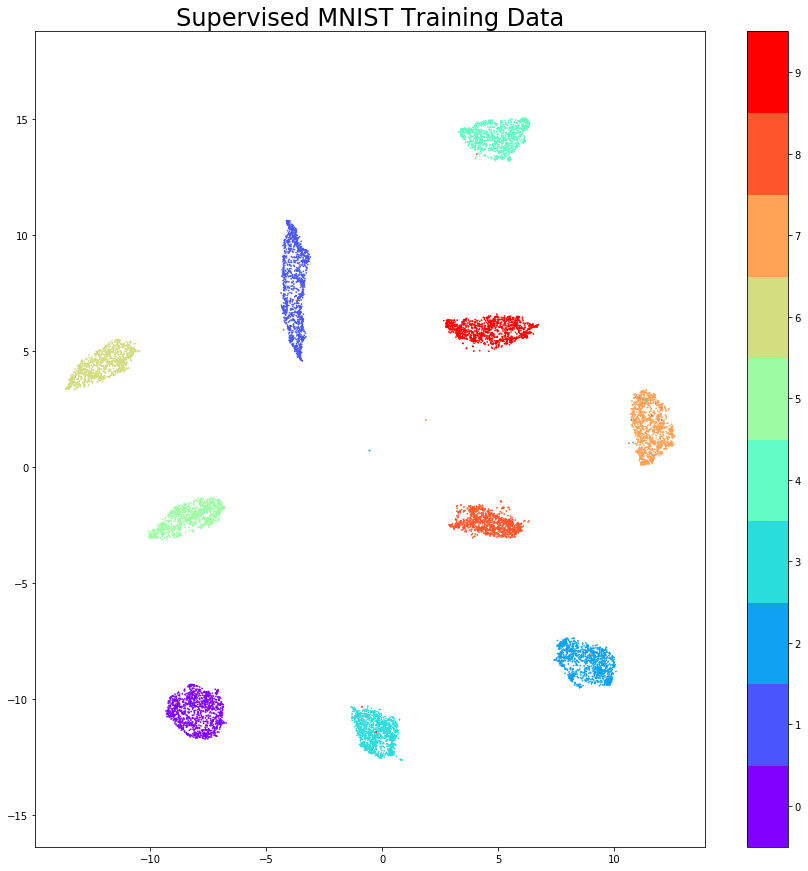

In [32]:
# Graphs supervised training results.
color = Y_train.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c = color, cmap = 'rainbow', s = 0.5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Supervised MNIST Training Data", fontsize = 24)
plt.show()

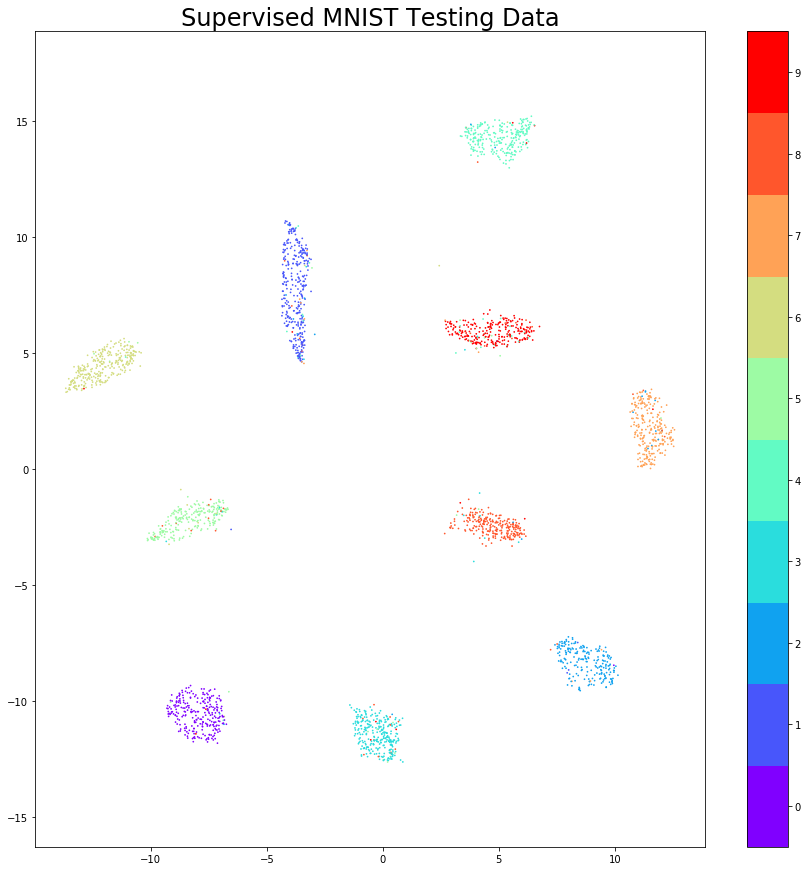

In [33]:
# Graphs the supervised test results.
color = Y_test.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_test[:, 0],embedding_test[:, 1],c = color, cmap = 'rainbow', s = 0.5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Supervised MNIST Testing Data", fontsize = 24)
plt.show()

<span style="color:blue"> <i> Answer: The classes are cleanly seperated. </i></span> <br>

UMAP has several hyperparameters that can have a significant impact on the resulting embedding: n_neighbors, min_dist, n_components, and metric. (https://umap-learn.readthedocs.io/en/latest/parameters.html)

Each of these parameters has a distinct effect, and we will look at n_neighbors and n_components.

**n_neighbors** controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

We can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value of n_neighbors for UMAP (as used above) is 15.

<span style="color:blue"> <i> 4. Choose n_neighbors= 2, 200. What happens as we increase n_neighbors? </i></span> <br>


In [34]:
neighbors = [2, 200]

In [ ]:
# Initialization and training using n_neighbors = 2.
model = umap.UMAP(n_neighbors = neighbors[0])
embedding_train = model.fit_transform(X_train, Y_train)

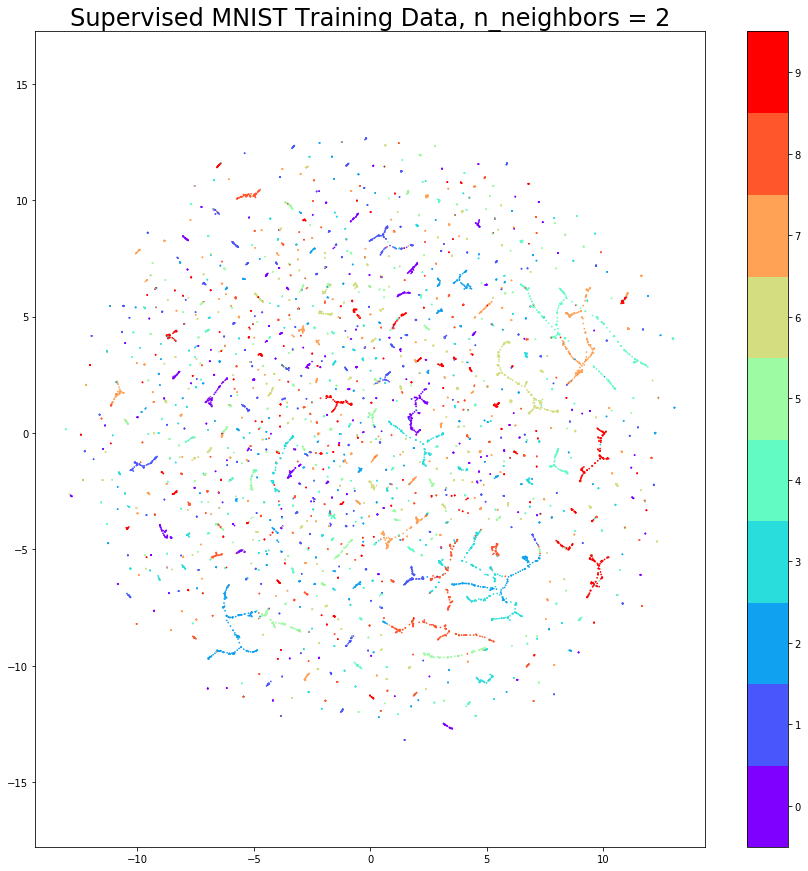

In [36]:
# Graphs supervised training results with n_neighbors = 2.
color = Y_train.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c = color, cmap = 'rainbow', s = 0.5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Supervised MNIST Training Data, n_neighbors = 2", fontsize = 24)
plt.show()

In [ ]:
# Initialization and training using n_neighbors = 200.
model = umap.UMAP(n_neighbors = neighbors[1])
embedding_train = model.fit_transform(X_train, Y_train)

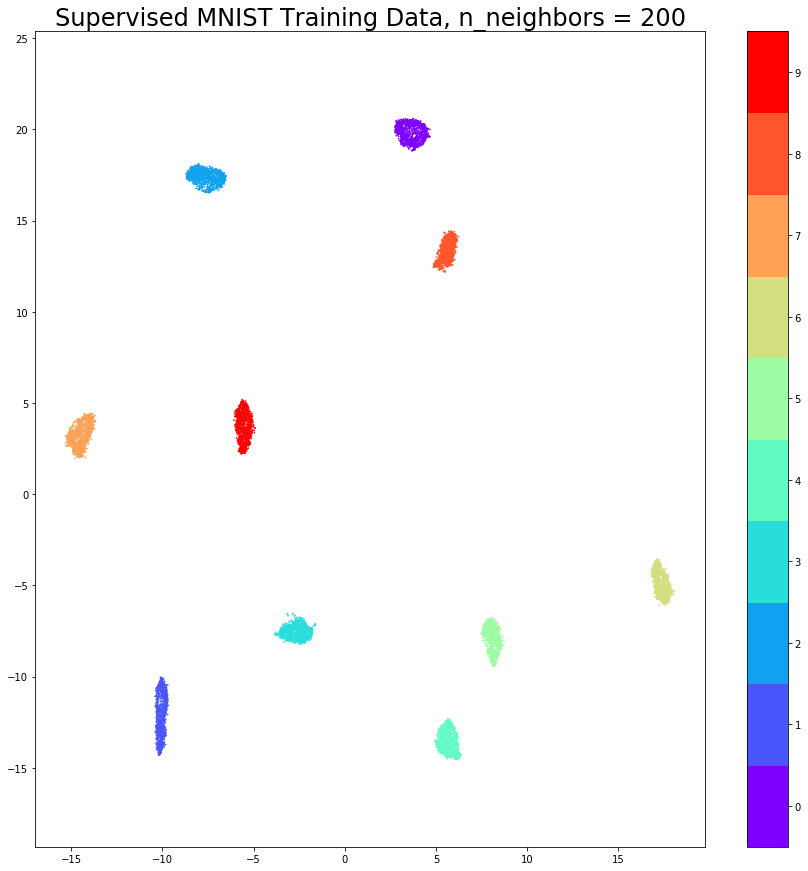

In [38]:
# Graphs supervised training results with n_neighbors = 200.
color = Y_train.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c = color, cmap = 'rainbow', s = 0.5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Supervised MNIST Training Data, n_neighbors = 200", fontsize = 24)
plt.show()

<span style="color:blue"> <i> Answer: As n_neighbors is increased, the clusters become tighter.  </i></span> <br>

With a value of n_neighbors=2 we see that UMAP merely glues together small chains, but due to the narrow/local view, fails to see how those connect together. It also leaves many different components (and even singleton points). This represents the fact that from a fine detail point of view the data is very disconnected and scattered throughout the space.

As n_neighbors is increased UMAP manages to see more of the overall structure of the data, gluing more components together, and better coverying the broader structure of the data. By the stage of n_neighbors=20 we have a fairly good overall view of the data showing how the various colors interelate to each other over the whole dataset.

As n_neighbors increases further more and more focus in placed on the overall structure of the data. This results in, with n_neighbors=200 a plot where the overall structure is well captured, but at the loss of some of the finer local sturcture.

***

As is standard for many scikit-learn dimension reduction algorithms UMAP provides a **n_components** parameter option that allows the user to determine the dimensionality of the reduced dimension space we will be embedding the data into. Unlike some other visualisation algorithms such as t-SNE UMAP scales well in embedding dimension, so you can use it for more than just visualisation in 2- or 3-dimensions.

For the purposes of this demonstration (so that we can see the effects of the parameter) we will only be looking at 1-dimensional and 3-dimensional embeddings, which we have some hope of visualizing.

First of all we will set n_components to 1, forcing UMAP to embed the data in a line. For visualisation purposes we will randomly distribute the data on the y-axis to provide some separation between points.

<span style="color:blue"> <i> 5. Choose n_components= 1, 3. Observe the scatterplots. </i></span> <br>

In [39]:
from mpl_toolkits.mplot3d import Axes3D

components = [1, 3]

In [ ]:
# Initialization and training using n_components = 1.
model = umap.UMAP(n_components = components[0])
embedding_train = model.fit_transform(X_train, Y_train)

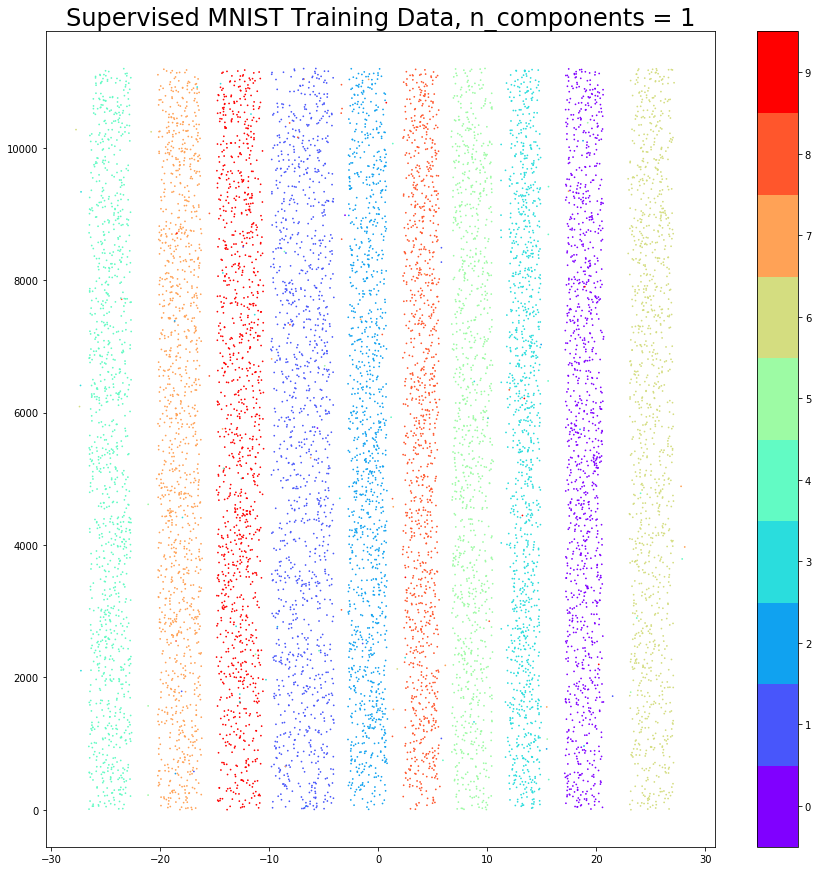

In [41]:
# Graphs supervised training results with n_components = 1.
color = Y_train.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_train[:, 0], range(embedding_train.size), c = color, cmap = 'rainbow', s = 0.5)
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Supervised MNIST Training Data, n_components = 1", fontsize = 24)
plt.show()

In [ ]:
# Initialization and training using n_components = 3.
model = umap.UMAP(n_components = components[1])
embedding_train = model.fit_transform(X_train, Y_train)

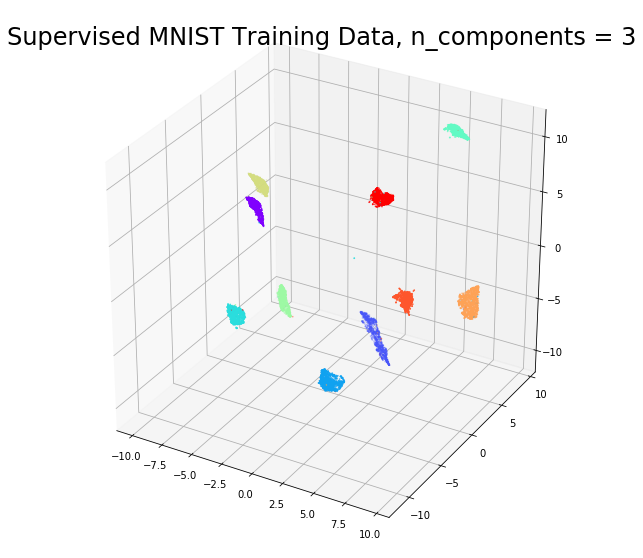

In [43]:
# Graphs supervised training results with n_components = 3.
color = Y_train.astype(int)

# Make plot
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')
dots = ax.scatter(embedding_train[:, 0], embedding_train[:,1], embedding_train[:,2], 
                  c = color, cmap = 'rainbow', s = 0.5)
plt.title("Supervised MNIST Training Data, n_components = 3", fontsize = 24)
plt.show()

UMAP is useful for generating visualisations, but if you want to make use of UMAP more generally for machine learning tasks it is important to be be able to train a model and then later pass new data to the model and have it transform that data into the learned space. For example if we use UMAP to learn a latent space and then train a classifier on data transformed into the latent space then the classifier is only useful for prediction if we can transform data for which we want a prediction into the latent space the classifier uses. Fortunately UMAP makes this possible, albeit more slowly than some other transformers that allow this.

To make use of UMAP as a data transformer we first need to fit the model with the training data. In this case we simply hand it the training data and it will learn an appropriate (two dimensional by default) embedding.

&nbsp; **model = umap.UMAP()**

&nbsp; **embedding_train_unsupervised = model.fit_transform(training X data)**

&nbsp; **embedding_test_unsupervised = model.transform(test X data)**

<span style="color:blue"> <i> 6. Do the unsupervised learning and create scatterplots for both training and test data. Color data points according to the corresponding target array $Y$. Make sure to label all 10 classes. Compared to Part 3, how did they perform? Also, has the test data been embedded into 2 dimensions in exactly the locations we should expect (by class) given the embedding of the training data? </i></span> <br>

In [ ]:
# Initialization and training.
model = umap.UMAP()
embedding_train_unsupervised = model.fit_transform(X_train)
embedding_test_unsupervised = model.transform(X_test)

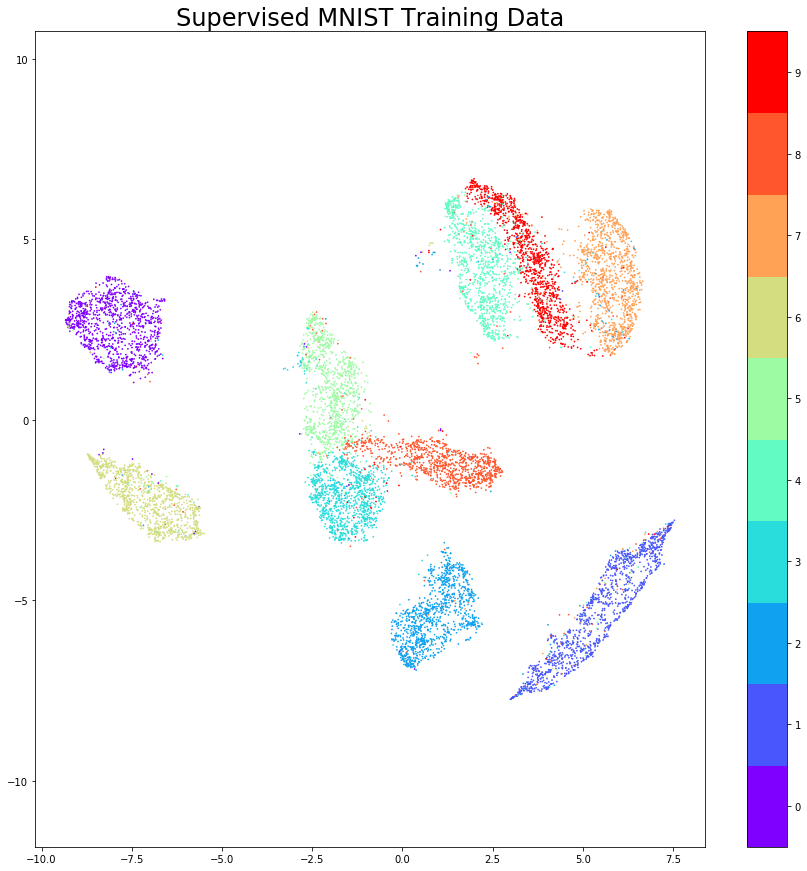

In [45]:
# Graphs unsupervised training results with n_components = 3.
color = Y_train.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_train_unsupervised[:, 0], embedding_train_unsupervised[:, 1],
            c = color, cmap = 'rainbow', s = 0.5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Supervised MNIST Training Data", fontsize = 24)
plt.show()

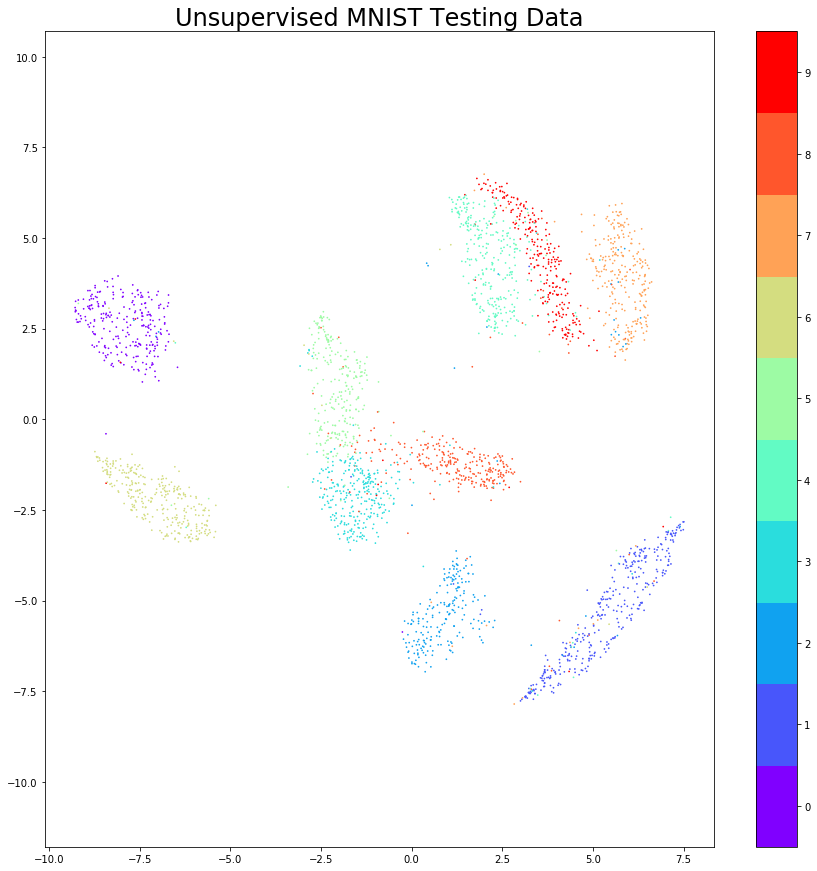

In [46]:
color = Y_test.astype(int)

plt.figure(figsize = (15, 15))
plt.scatter(embedding_test_unsupervised[:, 0], embedding_test_unsupervised[:, 1],
            c = color, cmap = 'rainbow', s = 0.5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("Unsupervised MNIST Testing Data", fontsize = 24)
plt.show()

<span style="color:blue"> <i> Answer: The unsupervised model does not perform as well as the supervised model in part 3. The unsupervised model does not cleanly seperate the classes. Yes the test data has been embedded in exactly the locations expected given the embedding of the training data. </i></span> <br>

UMAP can be used as an effective preprocessing step to boost the performance of density based clustering. This is somewhat controversial, and should be attempted with care. For a good discussion of some of the issues involved in this please see the various answers in this stackoverflow thread (https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne) on clustering the results of t-SNE. Many of the points of concern raised there are salient for clustering the results of UMAP. The most notable is that UMAP, like t-SNE, does not completely preserve density. UMAP, like t-SNE, can also create tears in clusters that are not actually present, resulting in a finer clustering than is necessarily present in the data. Despite these concerns there are still valid reasons to use UMAP as a preprocessing step for clustering. As with any clustering approach one will want to do some exploration and evaluation of the clusters that come out to try to validate them if possible.

With all of that said, let’s work through an example to demonstrate the difficulties that can face clustering approaches and how UMAP can provide a powerful tool to help overcome them.

<span style="color:blue"> <i> 7. Let's do unsupervised learning and identify distinct classes with the help of UMAP: </i></span> <br>

(1) First, reduce the data to 2-dimensions using UMAP. Do unsupervised learning on the training data. Choose "n_neighbors=30,min_dist=0.0,random_state=42"

For clustering, try HDBSCAN, which we believe to be among the most advanced density based tehcniques. 

(2) Create the HDBSCAN model (You can change the hyperparameter setting):

&nbsp; **HDBSCAN_model = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=100)**

(3) Take the embedding you created in (1) and get predicted classes using "fit_predict"

&nbsp; **HDBSCAN_labels = HDBSCAN_model.fit_predict(embedding)**

(4) Predicted label = -1 means that HDBSCAN refused to cluster that points and classify the as “noise.” Make the scatterplot in 2d using umap embedding and color points according to the cluster membership. Color noise as gray.

In [ ]:
# NOTE: hdbscan will be installed on datahub before Tuesday (9/17)!
import hdbscan

In [ ]:
model = umap.UMAP(n_neighbors = 30, min_dist = 0.0, random_state = 42)
embedding = model.fit_transform(X_train)

HDBSCAN_model = hdbscan.HDBSCAN(min_samples = 10, min_cluster_size = 100)
HDBSCAN_labels= HDBSCAN_model.fit_predict(embedding)

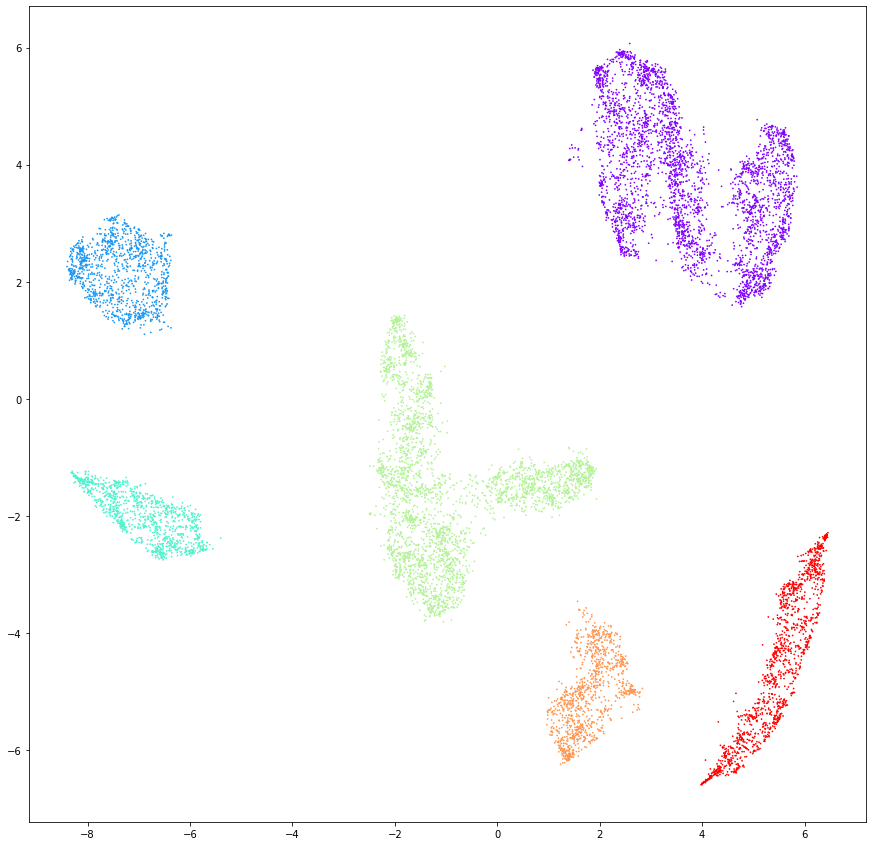

In [49]:
clustered = (HDBSCAN_labels > -1)
noise = ~(HDBSCAN_labels > -1)


plt.figure(figsize = (15, 15))
plt.scatter(embedding[noise, 0], embedding[noise, 1],
            c = "grey", s = 0.5)
plt.scatter(embedding[clustered, 0], embedding[clustered, 1],
            c = HDBSCAN_labels[clustered], cmap = "rainbow", s = 0.5)
plt.show()

<span style="color:blue"> <i> 8. Evaluate the adjusted Rand score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) and adjusted mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) for this clustering as compared with the true labels. </i></span> <br>

(Note: Changing the hyperparameters of UMAP/HDBSCAN model and increasing the total number of sample, you can improve those scores.) 

In [50]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [51]:
print("adjusted Rand score: ", adjusted_rand_score(Y_train, HDBSCAN_labels))
print("adjusted mutual information: ", adjusted_mutual_info_score(Y_train, HDBSCAN_labels))

adjusted Rand score:  0.5257175601069435
adjusted mutual information:  0.634455329407258


/srv/app/venv/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()